In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import json

from collections import OrderedDict
%config InlineBackend.figure_format = 'retina'

data_dir = 'training_data/train_subset_000'

full_dataset_dir = '/Users/larrychen/Downloads/CLEVR_v1.0/questions/CLEVR_train_questions.json'

In [2]:
with open(full_dataset) as data_file:    
    data = json.load(data_file)
    questions = data['questions']
    print(questions[0]['question'] + ' ' + questions[0]['answer'])

Are there more big green things than large purple shiny cubes? yes


In [3]:
q_vocab = {}
a_vocab = {}

for i, q in enumerate(questions):
    q_str = q['question']
    a_str = q['answer']
    a = a_str.lower()
    for word in re.split(r'\s+|[,;?.-]\s*', q_str):
        w = word.lower()
        if w in q_vocab and len(w) is not 0:
            q_vocab[w] += 1
        elif len(w) is not 0:
            q_vocab[w] = 1
            
    if a in a_vocab:
        a_vocab[a] += 1
    else:
        a_vocab[a] = 1

sorted_q_vocab = OrderedDict(sorted(q_vocab.items(), key=lambda t: t[1], reverse=True))
sorted_a_vocab = OrderedDict(sorted(a_vocab.items(), key=lambda t: t[1], reverse=True))

print(sorted_q_vocab)
print(sorted_a_vocab)


OrderedDict([('the', 1840293), ('is', 855893), ('of', 751361), ('that', 410029), ('same', 356333), ('thing', 338961), ('object', 328165), ('what', 322102), ('as', 319520), ('there', 305987), ('are', 296955), ('cylinder', 227196), ('big', 215977), ('tiny', 212216), ('small', 211638), ('rubber', 207862), ('matte', 207292), ('large', 203961), ('a', 172630), ('number', 151168), ('shape', 149550), ('color', 149349), ('in', 147506), ('front', 147506), ('left', 147462), ('behind', 147409), ('right', 146854), ('metal', 138743), ('things', 138586), ('metallic', 138536), ('shiny', 138356), ('size', 137288), ('material', 133614), ('objects', 127596), ('purple', 122354), ('cyan', 121582), ('blue', 121570), ('yellow', 121117), ('brown', 120977), ('red', 120527), ('gray', 120174), ('green', 119909), ('ball', 114145), ('sphere', 113869), ('block', 113328), ('cube', 113249), ('it', 103187), ('on', 98361), ('side', 98361), ('to', 98221), ('how', 95053), ('have', 88777), ('many', 82962), ('and', 81506),

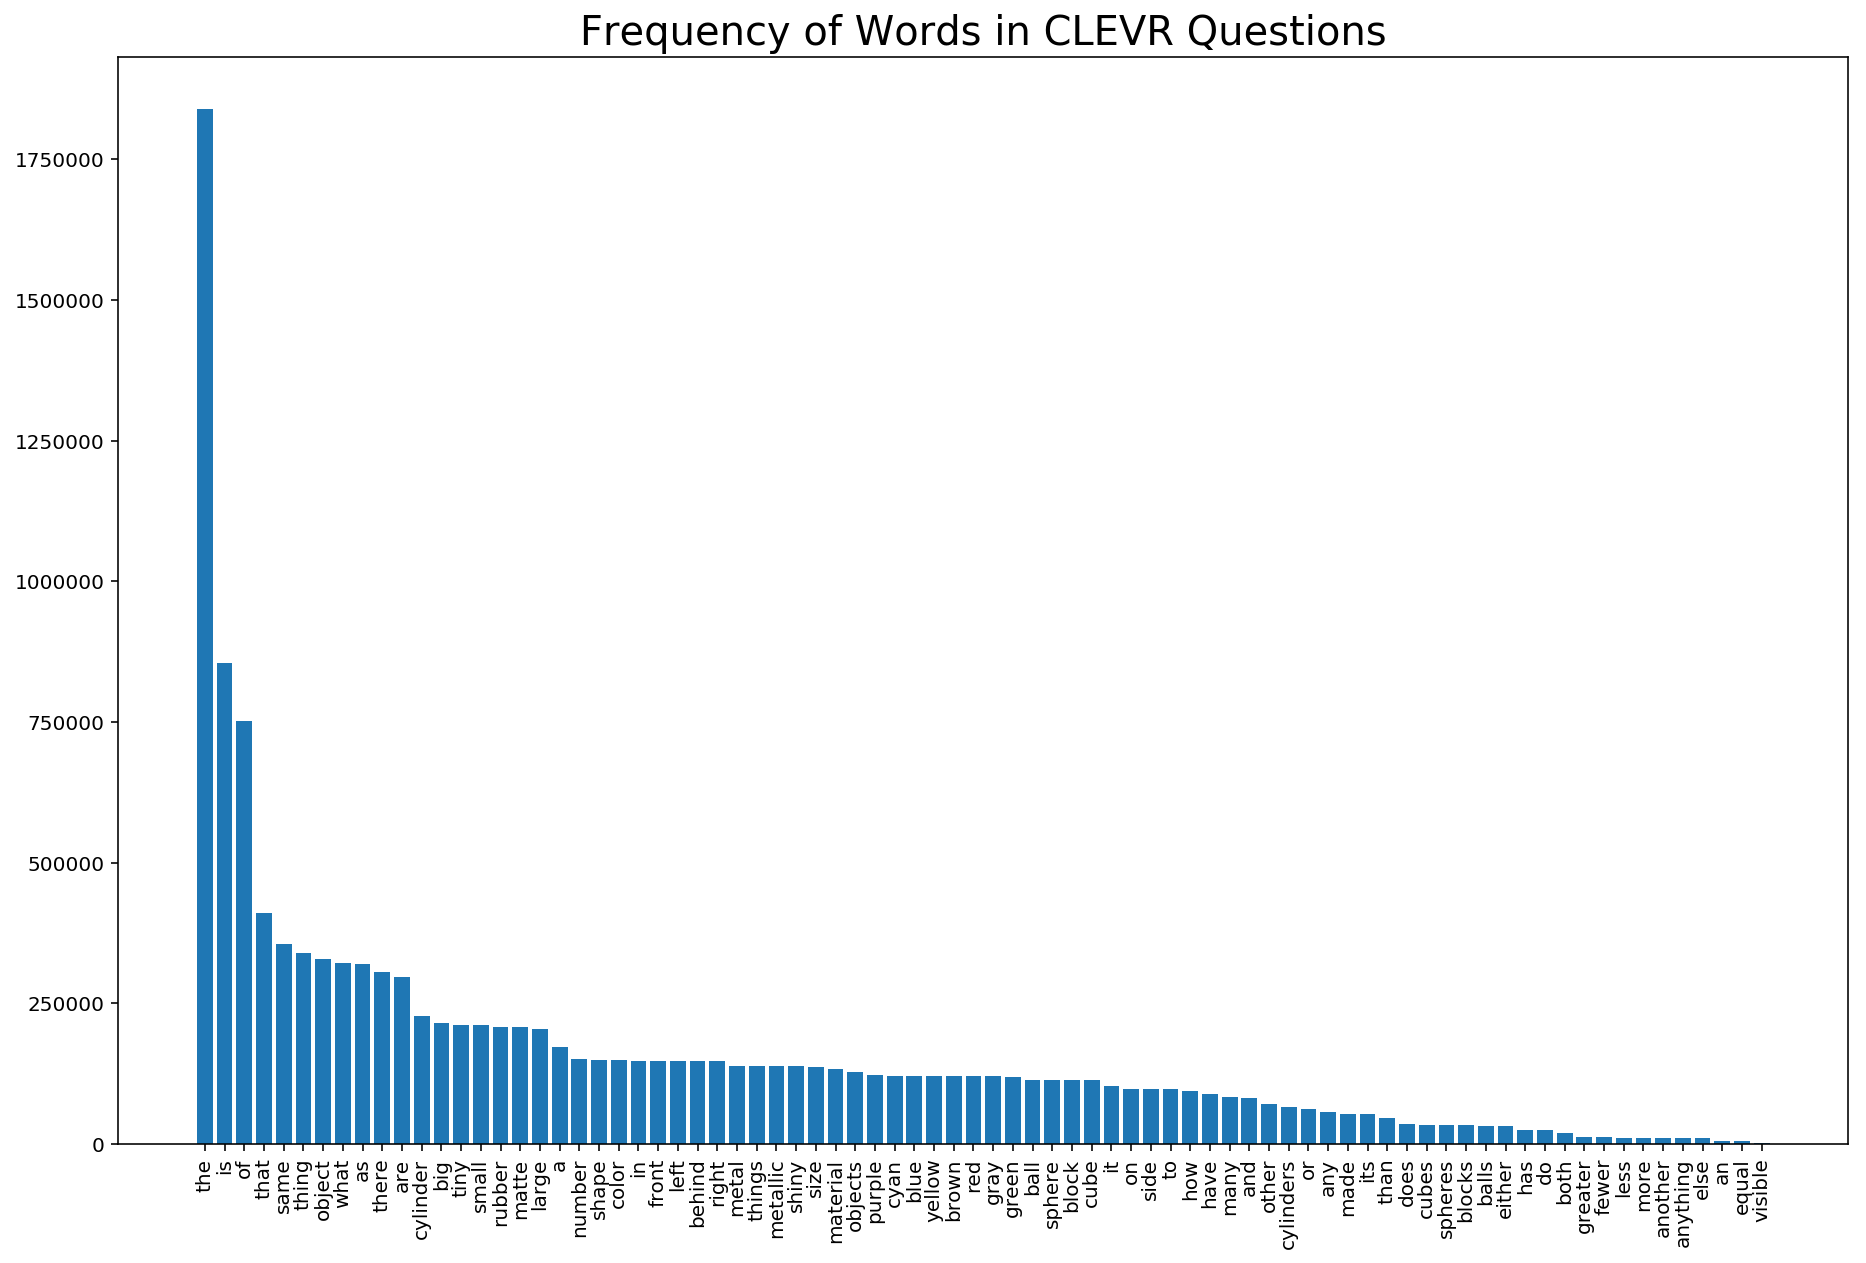

In [21]:
fig, ax = plt.subplots()

plt.title('Frequency of Words in CLEVR Questions', fontsize=20)
ax.bar(range(len(sorted_q_vocab)), sorted_q_vocab.values(), align='center')
plt.xticks(range(len(sorted_q_vocab)), list(sorted_q_vocab.keys()), rotation='vertical')
fig.set_size_inches(15.5,10)

plt.show()

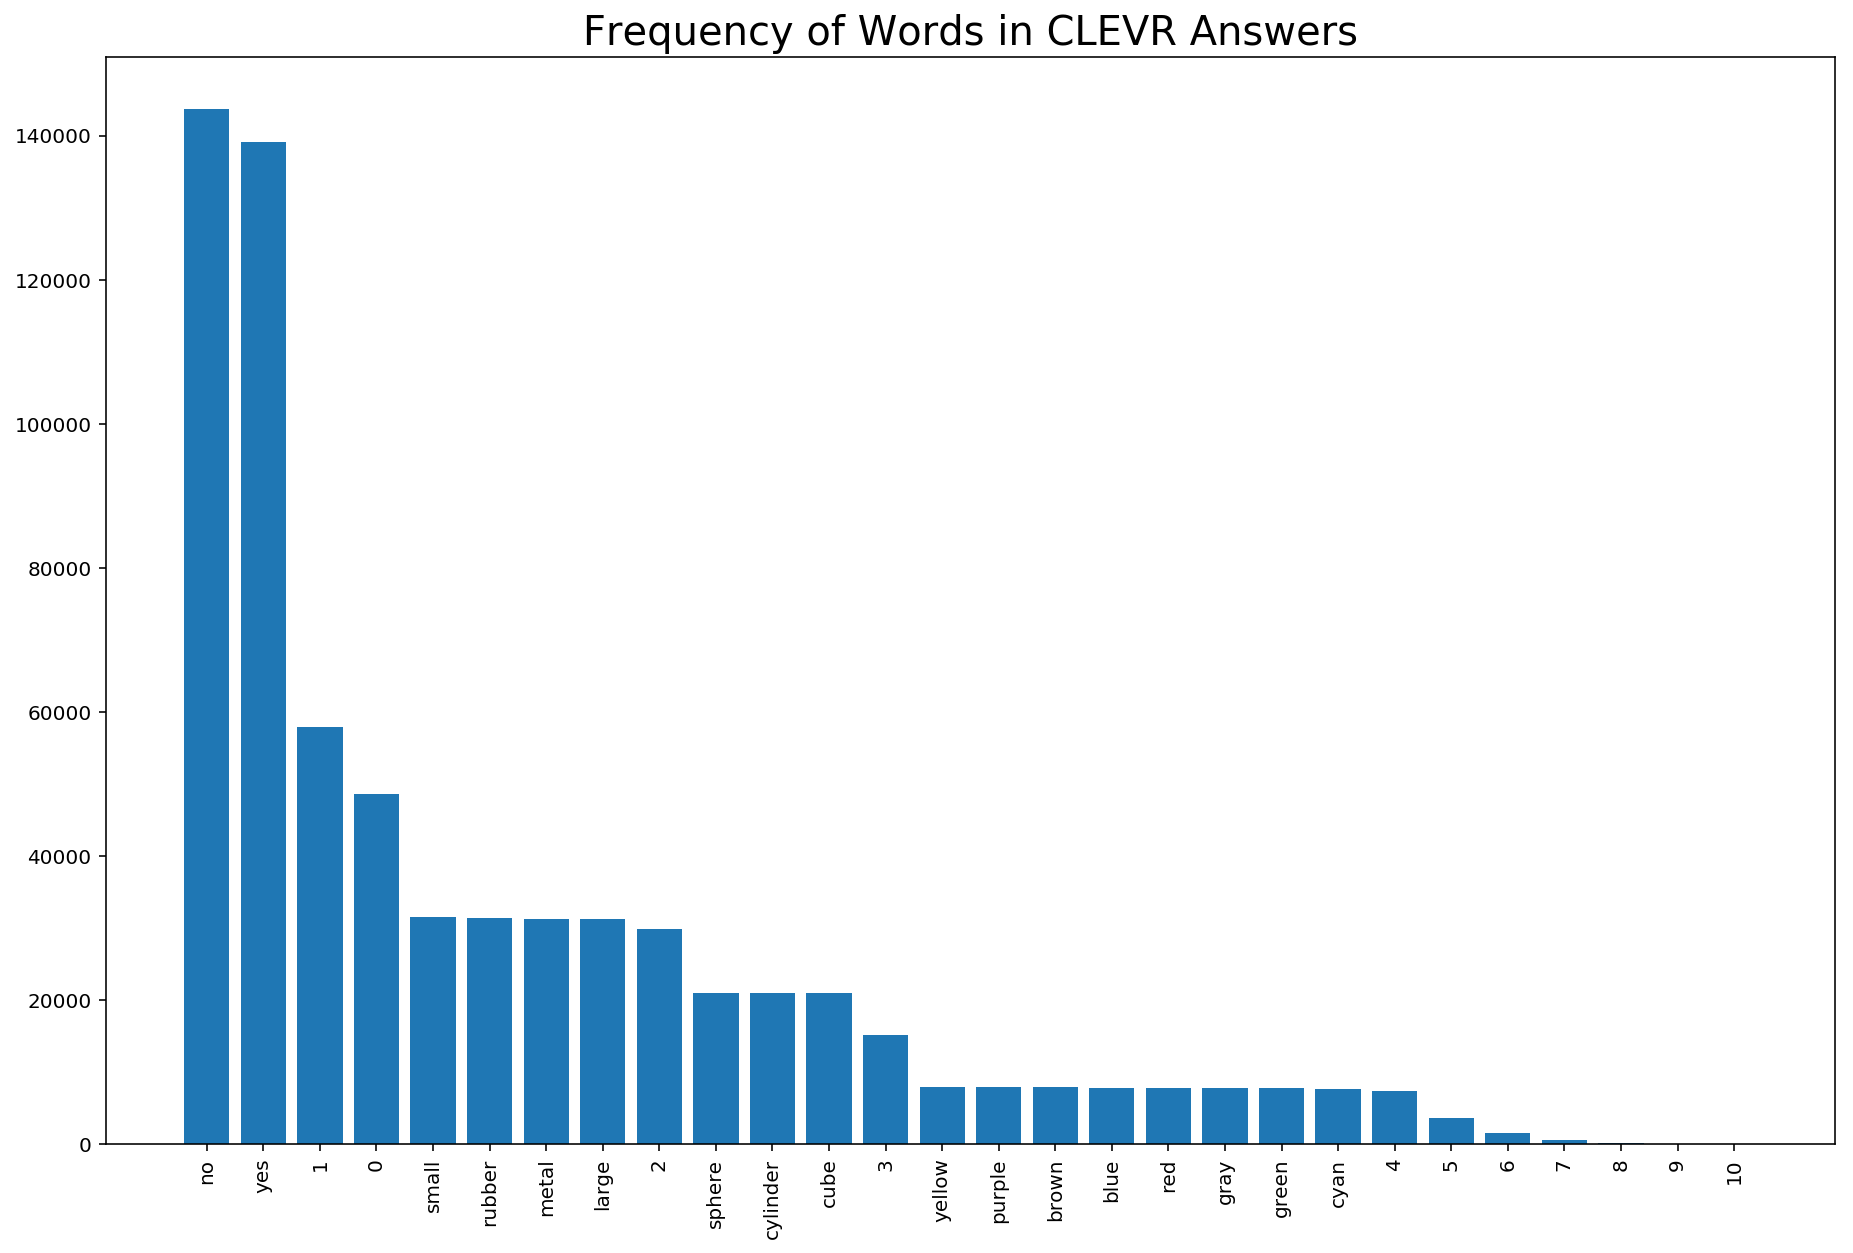

In [22]:
fig, ax = plt.subplots()

plt.title('Frequency of Words in CLEVR Answers', fontsize=20)
ax.bar(range(len(sorted_a_vocab)), sorted_a_vocab.values(), align='center')
plt.xticks(range(len(sorted_a_vocab)), list(sorted_a_vocab.keys()), rotation='vertical')
fig.set_size_inches(15.5,10)

plt.show()